In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load metadata file into a Dask DataFrame
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

# Load matrix file into a Dask DataFrame
matrix_path = '/Users/tanmaysagarhuria/Downloads/matrix (2).csv'
dask_df = dd.read_csv(matrix_path, sample=4000000)  # Adjust the sample size if needed

In [3]:
serotonin_genes_list = [
    'HTR1A', 'HTR1B', 'HTR2A', 'HTR2C', 'HTR3A', 'HTR4', 'HTR5A', 'HTR6', 'HTR7',
    'TPH1', 'TPH2', 'SLC6A4'  # Example of serotonin receptors and related genes
]

# Filter columns in the matrix that correspond to the serotonin genes
columns_to_keep = ['sample_name'] + serotonin_genes_list

# Create a new Dask DataFrame that only includes serotonin-related columns
serotonin_genes = dask_df[columns_to_keep]

In [4]:
# Define the relevant metadata columns to keep
relevant_columns = [
    'sample_name',
    'cluster_label',
    'class_label',
    'subclass_label',
    'region_label',
    'cortical_layer_label'
]

# Filter metadata to include only relevant columns
filtered_metadata = metadata[relevant_columns]

# Perform the merge operation
merged_df = dd.merge(serotonin_genes, filtered_metadata, on='sample_name', how='inner')

# Display the first few rows of the merged DataFrame to verify the merge
print(merged_df.head())

           sample_name  HTR1A  HTR1B  HTR2A  HTR2C  HTR3A  HTR4  HTR5A  HTR6  \
0  F2S4_160113_027_A01      0      0      0     35      0     1      0     0   
1  F2S4_160113_027_B01      0      0      0      0      0     0      0     0   
2  F2S4_160113_027_C01      0      0      0      3      0     2      1     0   
3  F2S4_160113_027_D01      0      0    262      0      0     0    158     0   
4  F2S4_160113_027_E01      0      0      0   1783      0     2      0     0   

   HTR7  TPH1  TPH2  SLC6A4          cluster_label class_label subclass_label  \
0     0     0   612       0                   <NA>        <NA>           <NA>   
1     0     0     0       0      Inh L2-5 VIP TOX2   GABAergic            VIP   
2     0     0     0       0     Inh L1 LAMP5 GGT8P   GABAergic          LAMP5   
3     3     0     0       0      Inh L1 LAMP5 NDNF   GABAergic          LAMP5   
4     0     0     0       0  Inh L1-3 VIP ZNF322P1   GABAergic            VIP   

  region_label cortical_layer_la

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values if any
numeric_df = numeric_df.dropna()

In [16]:
numeric_df['total_umi_count'] = numeric_df.sum(axis=1)

In [18]:
C = numeric_df['total_umi_count'].median_approximate().compute()

In [19]:
scaled_umi_matrix = numeric_df.div(numeric_df['total_umi_count'], axis=0).mul(C)

In [20]:
scaled_umi_matrix = scaled_umi_matrix.drop(columns=['total_umi_count'])

In [22]:
pip install --upgrade dask

  Obtaining dependency information for dask from https://files.pythonhosted.org/packages/a3/f8/b69157baa34fb62ea61a7a1f1cf12c9ef0358f465243a4bc873082a129be/dask-2024.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle>=3.0.0 from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: dask
    Found existing installation: dask 2024.7.0
    Uninstalling dask-2024.7.0:
      Successfully uninstalled dask-2024.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dist

In [27]:
pandas_df = numeric_df.compute()
# Now proceed with your operations using Pandas
scaled_umi_matrix = pandas_df.div(pandas_df['total_umi_count'], axis=0).mul(C)

In [28]:
import numpy as np

# Define the Freeman-Tukey transformation function
def freeman_tukey_transform(x):
    return np.sqrt(x) + np.sqrt(x + 1)

# Apply the Freeman-Tukey transformation to the scaled UMI matrix
transformed_umi_matrix = scaled_umi_matrix.applymap(freeman_tukey_transform)

# Inspect the result
print(transformed_umi_matrix.head())

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/1737690642.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transformed_umi_matrix = scaled_umi_matrix.applymap(freeman_tukey_transform)


   HTR1A  HTR1B      HTR2A      HTR2C  HTR3A       HTR4      HTR5A  HTR6  \
0    1.0    1.0   1.000000   9.528131    1.0   2.074785   1.000000   1.0   
1    NaN    NaN        NaN        NaN    NaN        NaN        NaN   NaN   
2    1.0    1.0   1.000000  28.705379    1.0  23.452040  16.613139   1.0   
3    1.0    1.0  31.941642   1.000000    1.0   1.000000  24.820743   1.0   
4    1.0    1.0   1.000000  40.548211    1.0   1.887118   1.000000   1.0   

       HTR7  TPH1       TPH2  SLC6A4  total_umi_count  
0  1.000000   1.0  39.429253     1.0        40.570918  
1       NaN   NaN        NaN     NaN              NaN  
2  1.000000   1.0   1.000000     1.0        40.570918  
3  3.685915   1.0   1.000000     1.0        40.570918  
4  1.000000   1.0   1.000000     1.0        40.570918  


In [31]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
transformed_umi_matrix_imputed = imputer.fit_transform(transformed_umi_matrix)

# Perform PCA
pca = PCA(n_components=13)
pca_result = pca.fit_transform(transformed_umi_matrix_imputed)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Display the PCA results
print(pca_df.head())

            PC1           PC2           PC3           PC4           PC5  \
0  1.055765e+01  1.468422e+01 -7.516373e-01  9.869525e-01  3.055785e+01   
1 -9.392137e-11  2.075891e-11  1.262831e-11  1.590100e-11  4.607741e-11   
2  2.410026e+01  7.976447e+00 -1.115668e+01  1.221418e+01 -9.592842e+00   
3 -1.786168e+01  5.675487e+00  1.137770e+01  1.543121e+01 -5.846220e+00   
4  1.656793e+01  2.898050e+01 -2.177819e+01  3.910272e-02 -3.401478e+00   

            PC6           PC7           PC8           PC9          PC10  \
0 -2.323109e+01 -6.625018e+00 -3.637501e-01 -1.107071e+00  2.604201e-01   
1  1.111097e-11  2.770022e-11  4.683209e-13  3.452641e-11 -2.542714e-12   
2 -2.182276e+00 -2.693954e+00 -1.947789e-01 -2.421542e+00  4.549607e-01   
3 -1.162966e+00 -1.853359e+00 -2.165750e-01 -1.387085e+00  2.173001e-01   
4 -4.914331e-02  8.255706e-01  3.313427e-01  1.605899e+00 -1.214725e-01   

           PC11          PC12          PC13  
0 -1.479215e-01 -1.126011e+00  2.131628e-14  
1  6.2

In [32]:
from sklearn.decomposition import PCA

# Perform PCA using the 'randomized' solver for faster computation
pca = PCA(n_components=13, svd_solver='randomized')
pca_result = pca.fit_transform(transformed_umi_matrix_imputed)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Display the PCA results
print(pca_df.head())

            PC1           PC2           PC3           PC4           PC5  \
0  1.055765e+01  1.468422e+01 -7.516373e-01  9.869525e-01  3.055785e+01   
1 -1.374758e-13  1.665298e-12 -2.925020e-11  1.163285e-11 -7.354247e-11   
2  2.410026e+01  7.976447e+00 -1.115668e+01  1.221418e+01 -9.592842e+00   
3 -1.786168e+01  5.675487e+00  1.137770e+01  1.543121e+01 -5.846220e+00   
4  1.656793e+01  2.898050e+01 -2.177819e+01  3.910272e-02 -3.401478e+00   

            PC6           PC7           PC8           PC9          PC10  \
0 -2.323109e+01 -6.625018e+00 -3.637501e-01 -1.107071e+00  2.604201e-01   
1 -2.433340e-11 -4.010353e-11 -5.586180e-12 -5.045578e-11  8.703159e-12   
2 -2.182276e+00 -2.693954e+00 -1.947789e-01 -2.421542e+00  4.549607e-01   
3 -1.162966e+00 -1.853359e+00 -2.165750e-01 -1.387085e+00  2.173001e-01   
4 -4.914331e-02  8.255706e-01  3.313427e-01  1.605899e+00 -1.214725e-01   

           PC11          PC12          PC13  
0 -1.479215e-01 -1.126011e+00  2.131628e-14  
1 -6.2

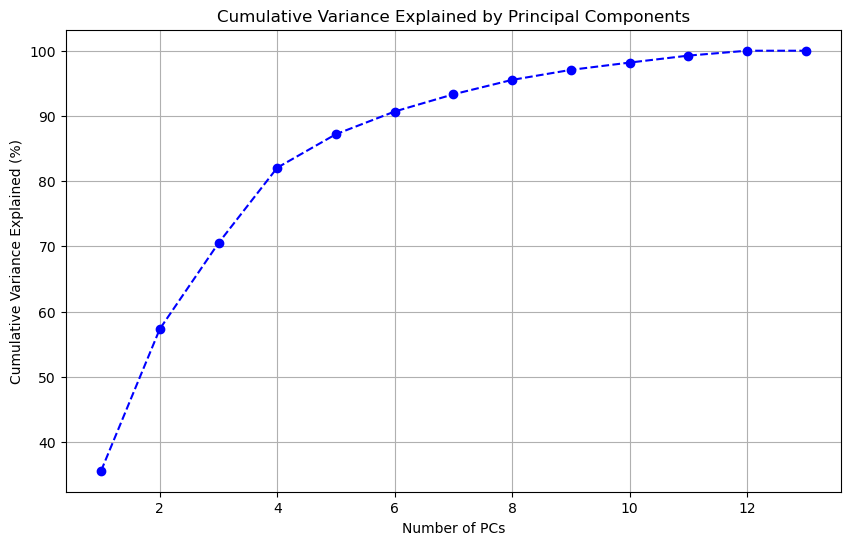

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming `transformed_umi_matrix_imputed` is your preprocessed matrix

# Perform PCA
pca = PCA(n_components=min(transformed_umi_matrix_imputed.shape[0], transformed_umi_matrix_imputed.shape[1]))
pca_result = pca.fit_transform(transformed_umi_matrix_imputed)

# Calculate the cumulative variance explained by each component
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid()
plt.show()

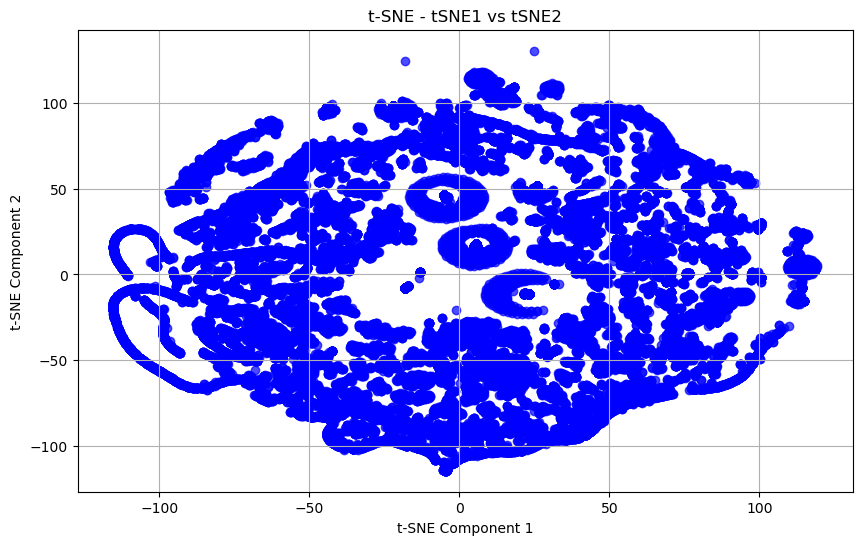

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming `pca_df` is the DataFrame containing your PCA results or `transformed_umi_matrix_imputed` for direct t-SNE

# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_df)  # or directly use transformed_umi_matrix_imputed

# Create a DataFrame to hold the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tSNE1', 'tSNE2'])

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c='blue', marker='o', alpha=0.7)
plt.title('t-SNE - tSNE1 vs tSNE2')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [35]:
print(scaled_umi_matrix.head())

   HTR1A  HTR1B       HTR2A       HTR2C  HTR3A        HTR4      HTR5A  HTR6  \
0    0.0    0.0    0.000000   22.199074    0.0    0.634259    0.00000   0.0   
1    NaN    NaN         NaN         NaN    NaN         NaN        NaN   NaN   
2    0.0    0.0    0.000000  205.500000    0.0  137.000000   68.50000   0.0   
3    0.0    0.0  254.567376    0.000000    0.0    0.000000  153.51773   0.0   
4    0.0    0.0    0.000000  410.539496    0.0    0.460504    0.00000   0.0   

       HTR7  TPH1        TPH2  SLC6A4  total_umi_count  
0  0.000000   0.0  388.166667     0.0            411.0  
1       NaN   NaN         NaN     NaN              NaN  
2  0.000000   0.0    0.000000     0.0            411.0  
3  2.914894   0.0    0.000000     0.0            411.0  
4  0.000000   0.0    0.000000     0.0            411.0  


In [36]:
import numpy as np

# Assume `scaled_umi_matrix` is your scaled data after Step 1 (scaling by median transcript count)

# Apply log transformation for scaling
# The log transformation will be applied after scaling by the factor C/t_i
log_scaled_umi_matrix = scaled_umi_matrix.applymap(lambda x: np.log1p(x))

# Display the first few rows to check the result
print(log_scaled_umi_matrix.head())

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/3712342620.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_scaled_umi_matrix = scaled_umi_matrix.applymap(lambda x: np.log1p(x))


   HTR1A  HTR1B     HTR2A     HTR2C  HTR3A      HTR4     HTR5A  HTR6  \
0    0.0    0.0  0.000000  3.144112    0.0  0.491190  0.000000   0.0   
1    NaN    NaN       NaN       NaN    NaN       NaN       NaN   NaN   
2    0.0    0.0  0.000000  5.330300    0.0  4.927254  4.241327   0.0   
3    0.0    0.0  5.543486  0.000000    0.0  0.000000  5.040309   0.0   
4    0.0    0.0  0.000000  6.019905    0.0  0.378782  0.000000   0.0   

       HTR7  TPH1      TPH2  SLC6A4  total_umi_count  
0  0.000000   0.0  5.964008     0.0         6.021023  
1       NaN   NaN       NaN     NaN              NaN  
2  0.000000   0.0  0.000000     0.0         6.021023  
3  1.364788   0.0  0.000000     0.0         6.021023  
4  0.000000   0.0  0.000000     0.0         6.021023  


In [37]:
import numpy as np

# Assume `scaled_umi_matrix` is your scaled data after Step 1 (scaling by median transcript count)

# Apply log transformation for scaling using DataFrame.map
log_scaled_umi_matrix = scaled_umi_matrix.map(np.log1p)

# Display the first few rows to check the result
print(log_scaled_umi_matrix.head())

   HTR1A  HTR1B     HTR2A     HTR2C  HTR3A      HTR4     HTR5A  HTR6  \
0    0.0    0.0  0.000000  3.144112    0.0  0.491190  0.000000   0.0   
1    NaN    NaN       NaN       NaN    NaN       NaN       NaN   NaN   
2    0.0    0.0  0.000000  5.330300    0.0  4.927254  4.241327   0.0   
3    0.0    0.0  5.543486  0.000000    0.0  0.000000  5.040309   0.0   
4    0.0    0.0  0.000000  6.019905    0.0  0.378782  0.000000   0.0   

       HTR7  TPH1      TPH2  SLC6A4  total_umi_count  
0  0.000000   0.0  5.964008     0.0         6.021023  
1       NaN   NaN       NaN     NaN              NaN  
2  0.000000   0.0  0.000000     0.0         6.021023  
3  1.364788   0.0  0.000000     0.0         6.021023  
4  0.000000   0.0  0.000000     0.0         6.021023  


In [38]:
import numpy as np

# Apply log transformation for scaling using DataFrame.map
log_scaled_umi_matrix = scaled_umi_matrix.map(np.log1p)

# Replace NaN values with 0.0
log_scaled_umi_matrix_filled = log_scaled_umi_matrix.fillna(0.0)

# Display the first few rows to check the result
print(log_scaled_umi_matrix_filled.head())

   HTR1A  HTR1B     HTR2A     HTR2C  HTR3A      HTR4     HTR5A  HTR6  \
0    0.0    0.0  0.000000  3.144112    0.0  0.491190  0.000000   0.0   
1    0.0    0.0  0.000000  0.000000    0.0  0.000000  0.000000   0.0   
2    0.0    0.0  0.000000  5.330300    0.0  4.927254  4.241327   0.0   
3    0.0    0.0  5.543486  0.000000    0.0  0.000000  5.040309   0.0   
4    0.0    0.0  0.000000  6.019905    0.0  0.378782  0.000000   0.0   

       HTR7  TPH1      TPH2  SLC6A4  total_umi_count  
0  0.000000   0.0  5.964008     0.0         6.021023  
1  0.000000   0.0  0.000000     0.0         0.000000  
2  0.000000   0.0  0.000000     0.0         6.021023  
3  1.364788   0.0  0.000000     0.0         6.021023  
4  0.000000   0.0  0.000000     0.0         6.021023  


In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=10)  # You can adjust the number of components
pca_result = pca.fit_transform(log_scaled_umi_matrix_filled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


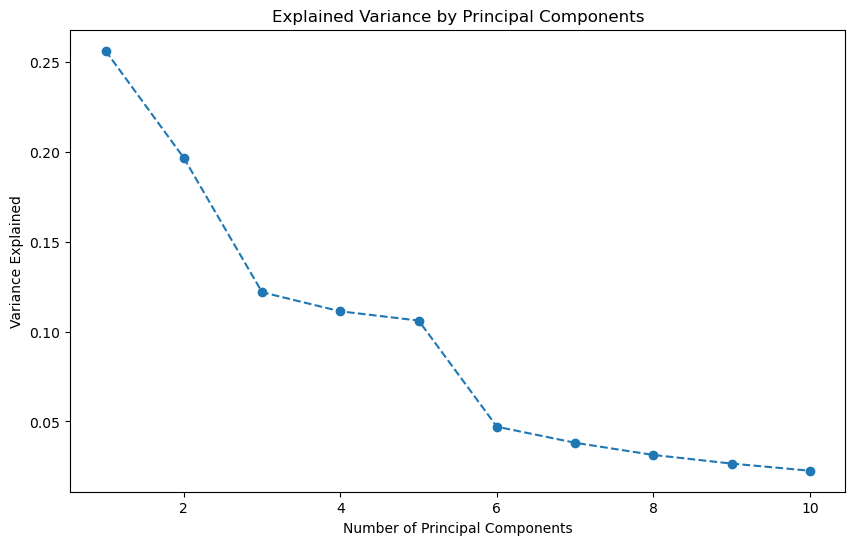

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

In [41]:
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.760715 -2.432723  1.534802 -1.067478 -0.399160  4.827922 -2.828880   
1  2.331536 -3.743270 -3.923909 -1.783612 -2.549855 -1.420291 -0.657389   
2  4.109828  1.309863  2.176513 -2.140568  3.798057 -1.315749 -0.595828   
3 -3.264118 -1.687558 -1.244741  1.015696  3.894620 -0.601875 -0.238826   
4  3.381576 -2.899476  3.711201 -1.642841 -0.072252 -0.504585  0.007855   

        PC8       PC9      PC10  
0 -0.631323 -0.085092 -0.240680  
1 -1.226209  0.513607  0.450274  
2 -0.690318  0.134865  0.110326  
3 -0.370809  0.040551 -0.021866  
4  0.563087 -0.409586 -0.466288  


/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/544611765.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, cmap='viridis')


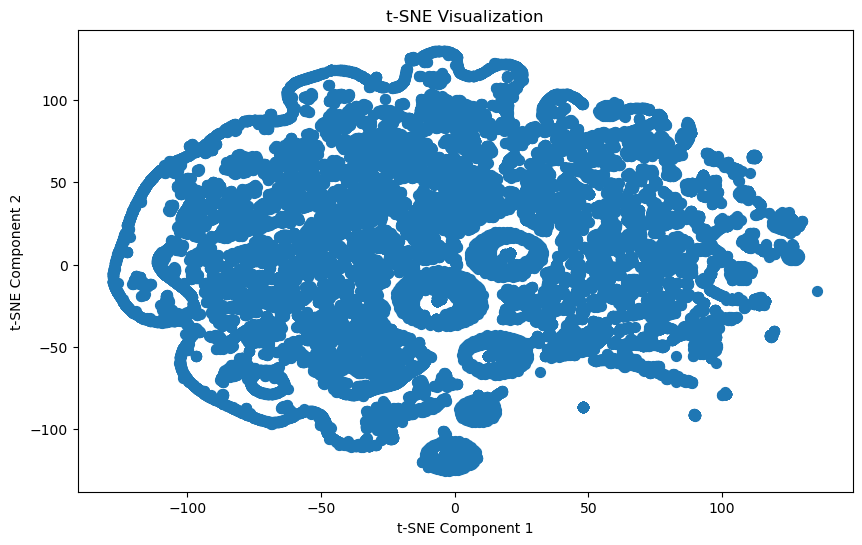

In [42]:
from sklearn.manifold import TSNE

# Perform t-SNE on the PCA results
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_df)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

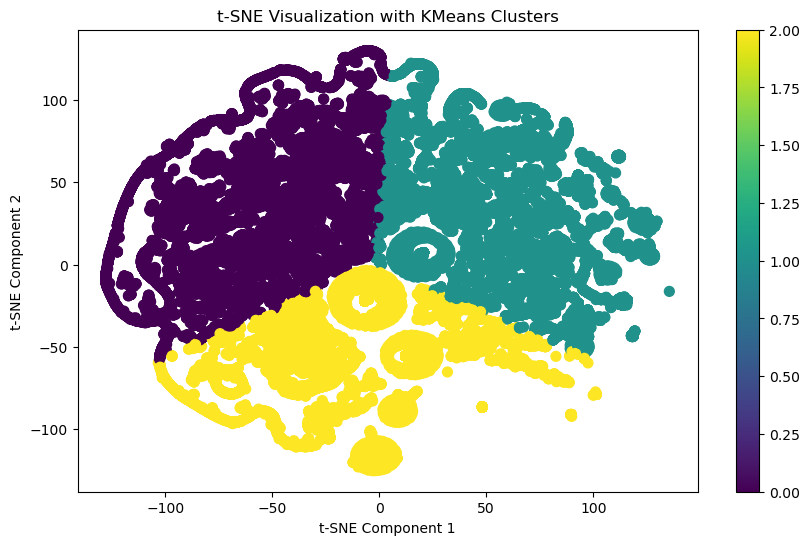

In [44]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(tsne_result)

# Plot the t-SNE results with cluster colors
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with KMeans Clusters')
plt.colorbar()
plt.show()

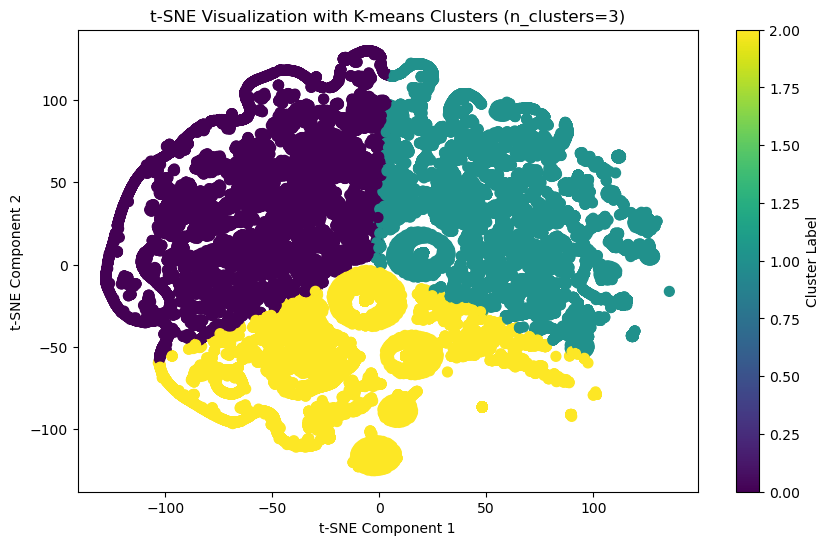

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have t-SNE results stored in tsne_result
# Let's perform K-means clustering with a specified number of clusters
# You can adjust the number of clusters (n_clusters) as per your requirement
n_clusters = 3  # Example: 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(tsne_result)

# Plot the t-SNE results with K-means cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f't-SNE Visualization with K-means Clusters (n_clusters={n_clusters})')
plt.colorbar(label='Cluster Label')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(tsne_result, kmeans.labels_)

print(f"The average silhouette score for {n_clusters} clusters is: {silhouette_avg:.3f}")

The average silhouette score for 3 clusters is: 0.374


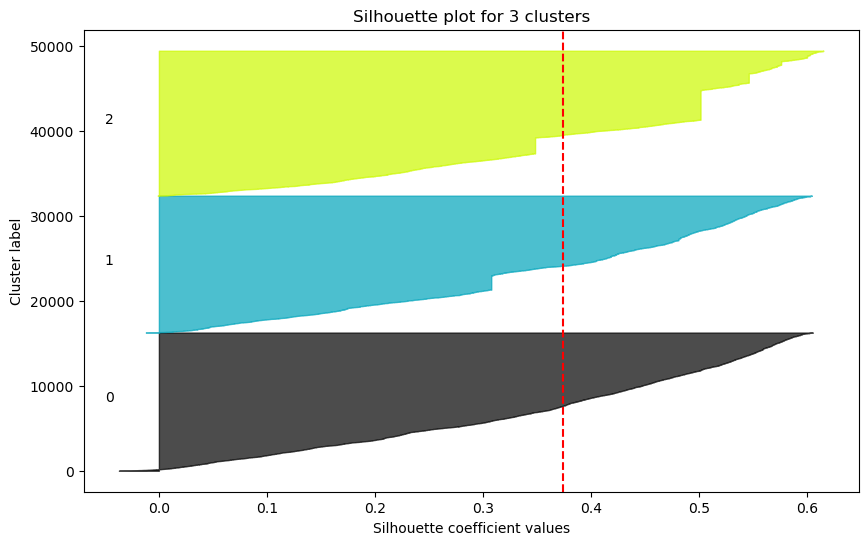

In [47]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(tsne_result, kmeans.labels_)

# Set up the plot
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

# Add labels and title
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.title(f"Silhouette plot for {n_clusters} clusters")
plt.show()

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/856421441.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, cmap='viridis')


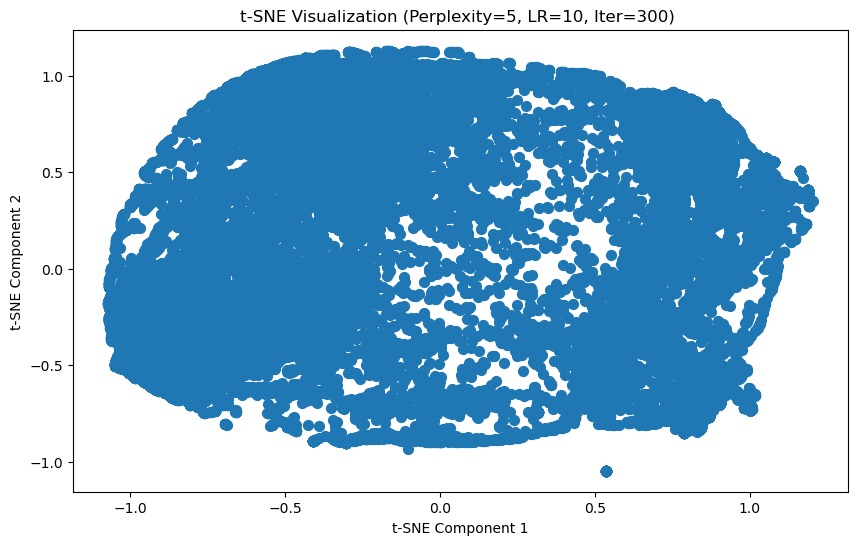

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/856421441.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, cmap='viridis')


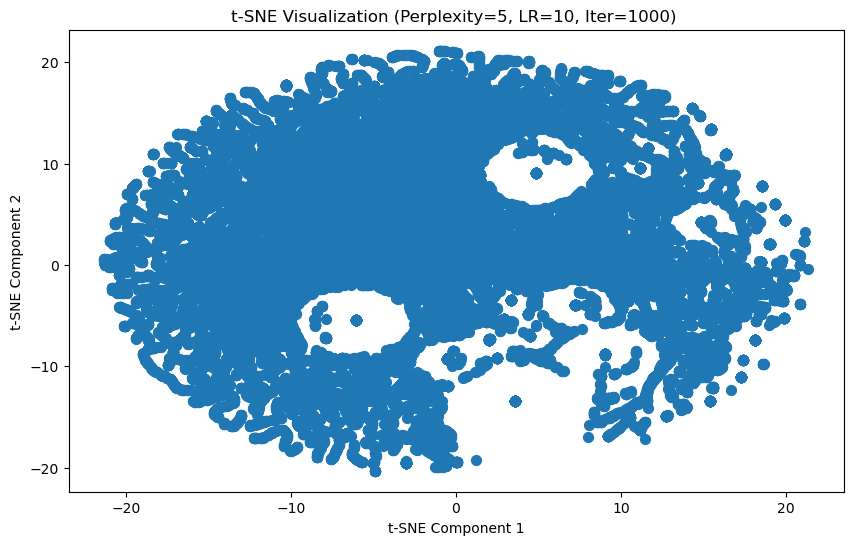

KeyboardInterrupt: 

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform t-SNE and plot the results
def plot_tsne(data, perplexity, learning_rate, n_iter, title_suffix=""):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, cmap='viridis')
    plt.title(f't-SNE Visualization (Perplexity={perplexity}, LR={learning_rate}, Iter={n_iter}) {title_suffix}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Assuming pca_df is your DataFrame with PCA results
# Example of tuning t-SNE parameters
perplexity_values = [5, 30, 50]       # Try different perplexity values
learning_rate_values = [10, 100, 500] # Try different learning rates
n_iter_values = [300, 1000, 3000]     # Try different numbers of iterations

for perplexity in perplexity_values:
    for learning_rate in learning_rate_values:
        for n_iter in n_iter_values:
            plot_tsne(pca_df, perplexity, learning_rate, n_iter)

In [51]:
# Load metadata file into a Dask DataFrame
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

# Load matrix file into a Dask DataFrame
matrix_path = '/Users/tanmaysagarhuria/Downloads/matrix (2).csv'
dask_df = dd.read_csv(matrix_path, sample=4000000)  # Adjust the sample size if needed

In [54]:
# Filter out cells with less than 200 detected genes
min_genes_per_cell = 200

# Select only numeric columns
numeric_columns = dask_df.select_dtypes(include=[np.number])



In [55]:
# Filter cells based on the sum of their gene counts
umi_matrix_filtered_cells = numeric_columns.loc[numeric_columns.sum(axis=1) > min_genes_per_cell, :]

In [58]:
import dask
import dask.dataframe as dd

# Set up Dask to use more workers (adjust according to your machine's capabilities)
dask.config.set(scheduler='threads', num_workers=8)

# Filter and compute in one go, this reduces the memory overhead
filtered_df = numeric_columns.map_partitions(lambda df: df.loc[df.sum(axis=1) > min_genes_per_cell, :]).compute()

In [60]:
import numpy as np

# Apply log1p transformation to the filtered data
normalized_df = np.log1p(filtered_df)

# Display the first few rows to check the result
print(normalized_df.head())

   3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2      A1BG  A1BG-AS1  A1CF  \
0      0.0      0.0      0.0      0.0      0.0  0.000000       0.0   0.0   
1      0.0      0.0      0.0      0.0      0.0  4.779123       0.0   0.0   
2      0.0      0.0      0.0      0.0      0.0  0.000000       0.0   0.0   
3      0.0      0.0      0.0      0.0      0.0  5.075174       0.0   0.0   
4      0.0      0.0      0.0      0.0      0.0  0.693147       0.0   0.0   

        A2M  A2M-AS1  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1    ZYG11B  \
0  3.737670      0.0  ...   0.0  5.645447  0.000000       0.0  0.000000   
1  0.000000      0.0  ...   0.0  6.794587  0.000000       0.0  4.836282   
2  0.000000      0.0  ...   0.0  0.000000  0.693147       0.0  5.087596   
3  0.000000      0.0  ...   0.0  5.049856  0.693147       0.0  4.406719   
4  0.693147      0.0  ...   0.0  2.708050  0.693147       0.0  6.196444   

       ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  
0  3.73767  6.107023  0.000000    

In [61]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=30)  # Adjust the number of components as needed
pca_result = pca.fit_transform(normalized_df)

# Convert the PCA result to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Display the first few rows
print(pca_df.head())

         PC1        PC2        PC3        PC4        PC5        PC6  \
0  59.728514  28.024646  34.783589 -24.880779  -5.631430 -13.821917   
1   4.439074 -55.193593  41.066082  14.496987 -25.446150  -7.605939   
2  11.500035   4.536674  59.969866   4.463367 -18.466783  -9.477996   
3  34.298972 -22.125634  44.940990   1.798195 -19.218962 -11.431354   
4 -12.649792  -3.192708  52.228553  14.836880 -14.488724  -3.006652   

         PC7        PC8        PC9       PC10  ...      PC21      PC22  \
0  -7.369666  -5.025815  11.550922   9.549078  ... -2.811173  2.318948   
1  27.503759  20.485438   9.538377   2.833138  ... -0.640267  0.406658   
2  20.430223  22.355888   3.226518  -1.038229  ... -0.217834 -3.329616   
3  23.507018  19.909536  11.960869  12.803698  ... -1.581723 -0.704505   
4  16.525547  18.837435  -2.938368 -12.682499  ...  0.905956  6.901477   

       PC23       PC24       PC25       PC26      PC27       PC28       PC29  \
0 -7.935174   3.899169 -10.636851   6.696273  3.

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/2800435992.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=5, cmap='viridis')


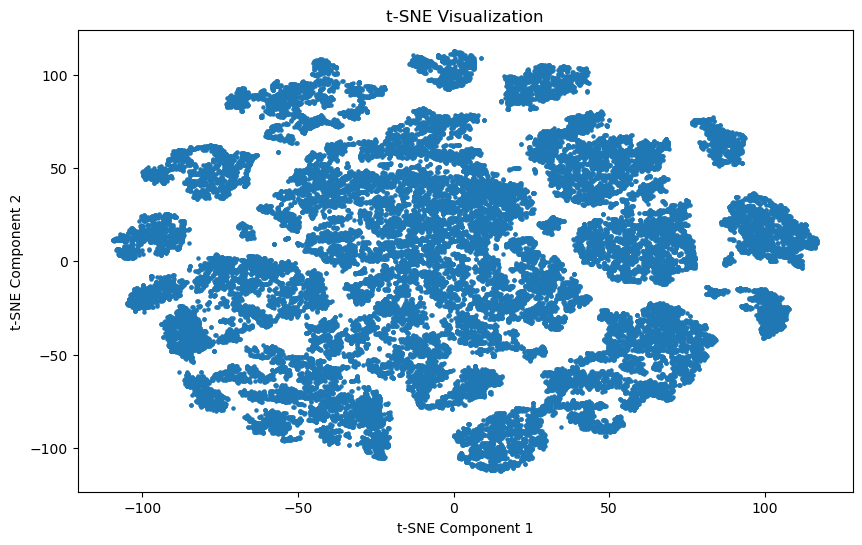

In [62]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_df)

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=5, cmap='viridis')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

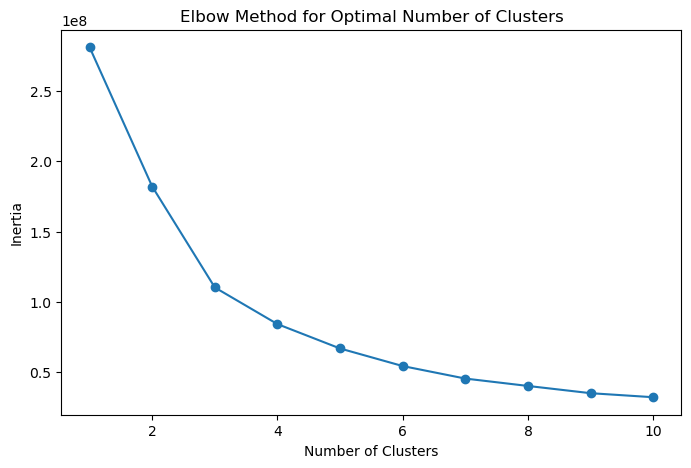

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

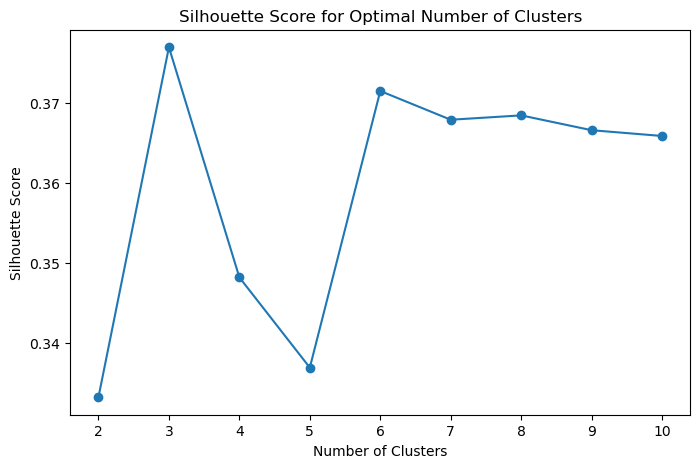

In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_result)
    silhouette_avg = silhouette_score(tsne_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [65]:
from sklearn.cluster import KMeans

# Apply KMeans with the number of clusters you determined earlier
kmeans = KMeans(n_clusters=4, random_state=42)  # you can change n_clusters based on the elbow method
kmeans_labels = kmeans.fit_predict(tsne_result)


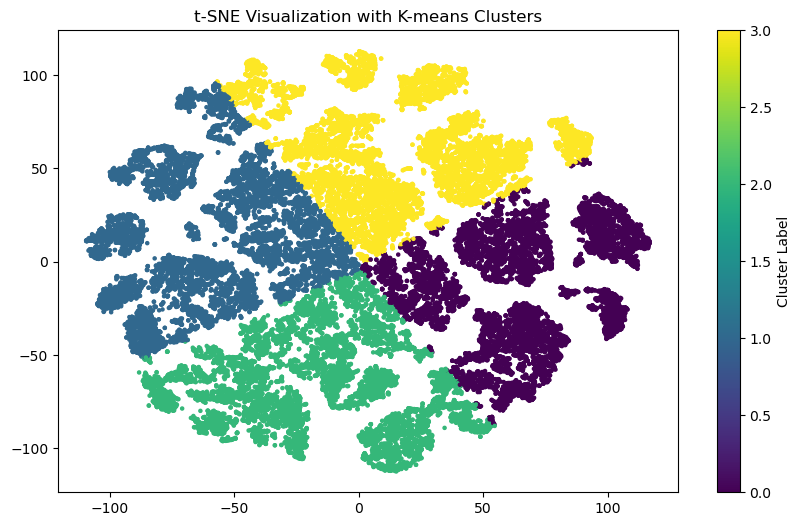

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.colorbar(label='Cluster Label')
plt.title('t-SNE Visualization with K-means Clusters')
plt.show()

In [67]:
# Filter out cells with fewer than 250 detected genes
min_genes_per_cell = 250
umi_matrix_filtered_cells = numeric_columns.loc[numeric_columns.sum(axis=1) > min_genes_per_cell, :]



In [70]:
# Compute the shape of the filtered cells dataframe to get the number of cells
num_cells = umi_matrix_filtered_cells.shape[0].compute()

In [71]:
# Now, calculate the minimum number of cells per gene
min_cells_per_gene = int(0.01 * num_cells)

In [73]:
umi_matrix_filtered_genes = umi_matrix_filtered_cells.loc[:, 
                                    (umi_matrix_filtered_cells > 0).sum(axis=0).compute() > min_cells_per_gene]

In [74]:
# Normalize the data
normalized_df = np.log1p(umi_matrix_filtered_genes)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca_result = pca.fit_transform(normalized_df)

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

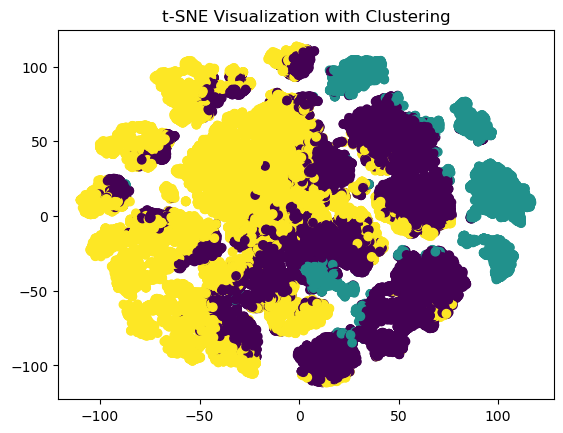

In [77]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title("t-SNE Visualization with Clustering")
plt.show()

In [79]:
from sklearn.metrics import silhouette_score

# Assuming `data` is your data matrix and `labels` are the cluster labels from K-Means
score = silhouette_score(tsne_result, kmeans_labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3451476991176605


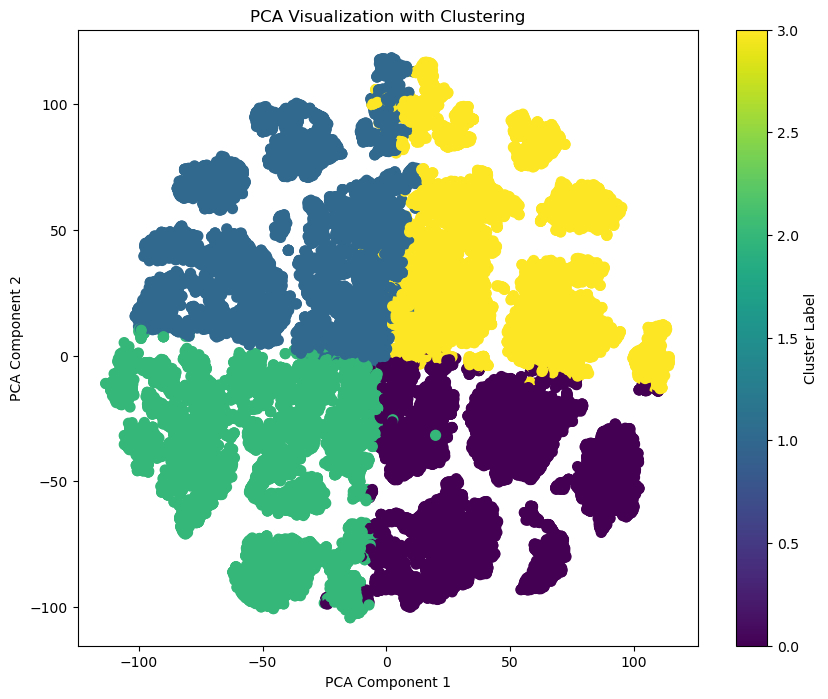

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tsne_result)  # You can also use your original data instead of tsne_result

# Plot the PCA result with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization with Clustering')
plt.show()

In [87]:
from sklearn.decomposition import PCA

# Perform PCA and reduce dimensions
pca = PCA(n_components=20)  # Adjust number of components as needed

In [88]:
pca_selected_data = pca.fit_transform(normalized_df)

In [89]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

Explained Variance by each component: [0.08898471 0.02137303 0.01489704 0.00895197 0.00691447 0.00567838
 0.00479372 0.00459321 0.00431439 0.00324396 0.0030006  0.00284141
 0.00254644 0.00231238 0.00218854 0.00215587 0.00177366 0.00170436
 0.00167054 0.00150127]


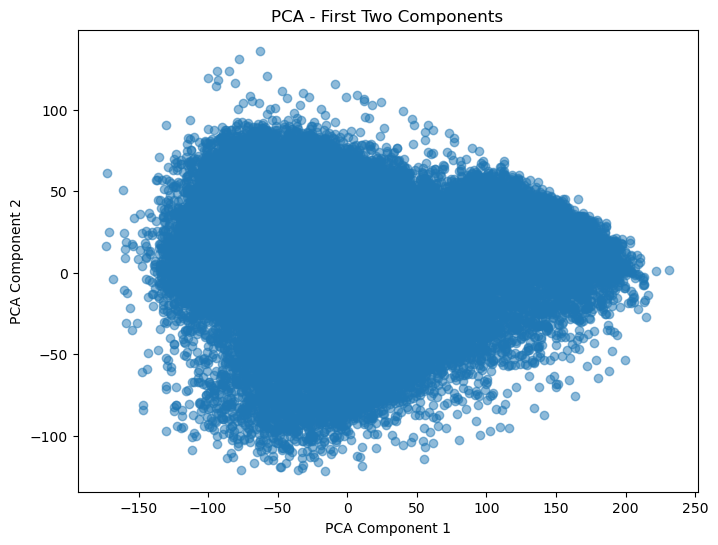

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_selected_data[:, 0], pca_selected_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - First Two Components')
plt.show()

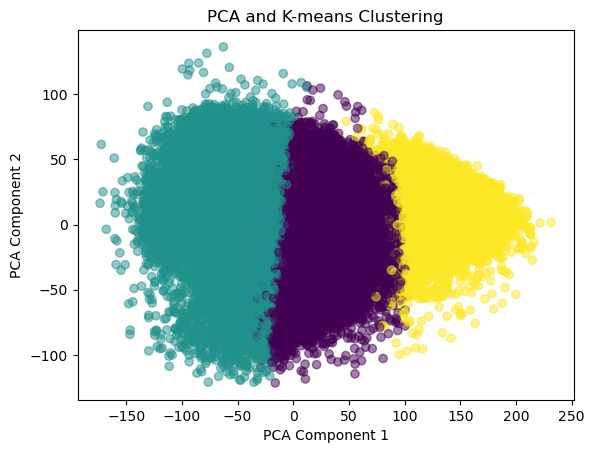

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_selected_data)

plt.scatter(pca_selected_data[:, 0], pca_selected_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA and K-means Clustering')
plt.show()

In [92]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_selected_data, clusters)
print(f"Silhouette Score on PCA-Reduced Data: {score}")

Silhouette Score on PCA-Reduced Data: 0.22018854037045013


In [93]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit NearestNeighbors model to data
neighbors = NearestNeighbors(n_neighbors=10)  # 10 is a good start for min_samples
neighbors_fit = neighbors.fit(pca_selected_data)
distances, indices = neighbors_fit.kneighbors(pca_selected_data)


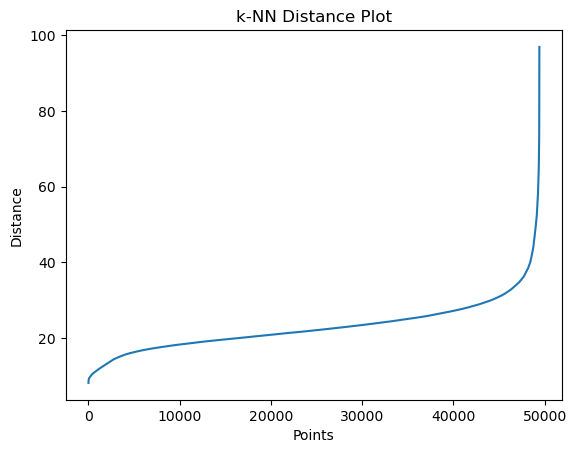

In [94]:
distances = np.sort(distances[:, 9], axis=0)  # 9 corresponds to k = min_samples - 1
plt.plot(distances)
plt.title('k-NN Distance Plot')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [95]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Set the parameters based on your analysis
epsilon = 10  # Example value, adjust based on your k-NN plot
min_samples = 80  # Assuming you have reduced the dimensions to 20 using PCA

In [96]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(pca_selected_data)

In [98]:
# Adjusted parameters
epsilon = 5  # Example: Try lowering this value
min_samples = 50  # Example: Adjust based on data density

# Perform DBSCAN clustering again
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(pca_selected_data)

# Check how many clusters were created
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 0


In [99]:
if n_clusters > 1:
    dbscan_silhouette_score = silhouette_score(pca_selected_data, dbscan_clusters)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_score}")
else:
    print("DBSCAN did not create multiple clusters. Adjust parameters.")

DBSCAN did not create multiple clusters. Adjust parameters.


In [100]:
from sklearn.cluster import OPTICS

# Perform OPTICS clustering
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.1)
optics_clusters = optics.fit_predict(pca_selected_data)

In [101]:
n_clusters_optics = len(set(optics_clusters)) - (1 if -1 in optics_clusters else 0)
print(f"Number of clusters (OPTICS): {n_clusters_optics}")

Number of clusters (OPTICS): 1


In [102]:
if n_clusters_optics > 1:
    optics_silhouette_score = silhouette_score(pca_selected_data, optics_clusters)
    print(f"Silhouette Score for OPTICS: {optics_silhouette_score}")
else:
    print("OPTICS did not create multiple clusters. Adjust parameters.")

OPTICS did not create multiple clusters. Adjust parameters.


In [103]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=50)  # You can experiment with 50, 100, or more components

In [106]:
pca_selected_data = pca.fit_transform(normalized_df)

In [108]:
# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Print the total variance explained by the selected components
print(f"Total variance explained by {pca.n_components} components: {total_explained_variance:.2f}")

Total variance explained by 50 components: 0.19


/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/837288326.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


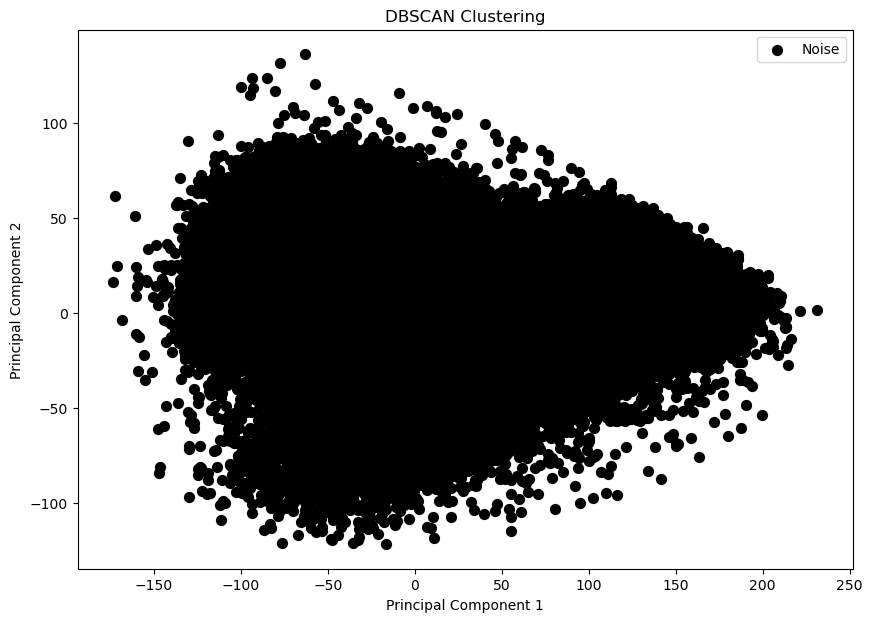

In [110]:
unique_labels = set(dbscan_clusters)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

# Scatter plot
plt.figure(figsize=(10, 7))
for label in unique_labels:
    if label == -1:
        # Black used for noise.
        color = [0, 0, 0, 1]
    else:
        color = colors(label / max(unique_labels))
    plt.scatter(pca_selected_data[dbscan_clusters == label, 0], 
                pca_selected_data[dbscan_clusters == label, 1], 
                c=[color], 
                label=f'Cluster {label}' if label != -1 else 'Noise', 
                s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [111]:
dbscan = DBSCAN(eps=10, min_samples=20)
dbscan_clusters = dbscan.fit_predict(pca_selected_data)

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_34920/3311106948.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


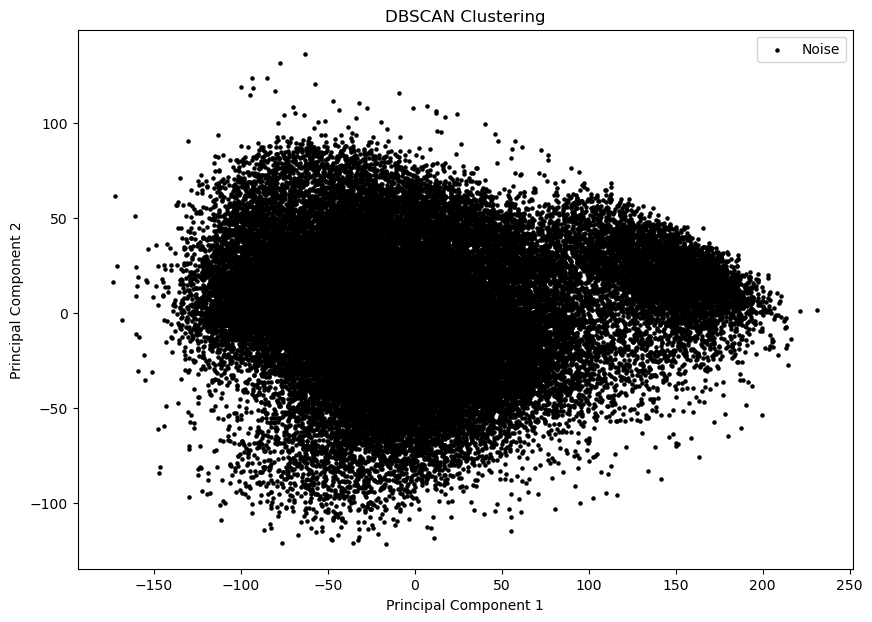

In [112]:
unique_labels = set(dbscan_clusters)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 7))
for label in unique_labels:
    if label == -1:
        color = 'k'  # black for noise
    else:
        color = colors(label / len(unique_labels))

    plt.scatter(pca_selected_data[dbscan_clusters == label, 0],
                pca_selected_data[dbscan_clusters == label, 1],
                c=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=5)

plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()